In [1]:

import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.datasets import make_blobs

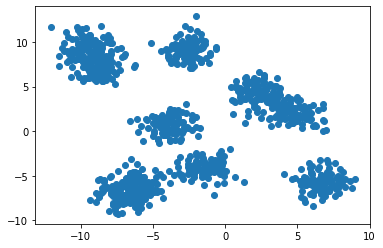

In [2]:

X, y = make_blobs(1000 , centers=10, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

In [3]:

class Cluster:
    
    def __init__(self, center, label):
        
        self.center = center
        self.label = label
        self.points = []
    
    
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [4]:
class KMeansCustom:
    
    def __init__(self, n_clusters=3, max_iters=20, n_init=10):
        
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        
    def fit(self, X):
        
        clusters = []
        
        for i in range(self.n_clusters):
            cluster = Cluster(random.choice(X), i)
            clusters.append(cluster)
            
        for i in range(self.max_iters):
            labels = []
            
            for point in X:
                distances = []
                
                for cluster in clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))

                index = np.array(distances)[:, 0].argmin()
                
                selected_dis, selected_cluster = distances[index]
                
                selected_cluster.points.append(point)
                labels.append(selected_cluster.label)
            
            for cluster in clusters:
                cluster.relocate()
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
   

In [5]:
model = KMeansCustom(3)

In [6]:
model.fit(X)

In [7]:
model.cluster_centers_

[array([-6.96967757,  8.61605327]),
 array([-4.63708211, -4.20270404]),
 array([4.51122109, 0.19003986])]

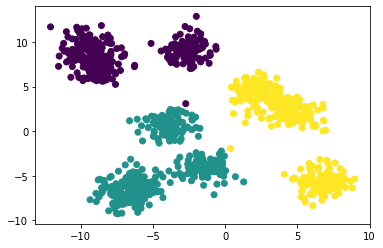

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)